### Inspecting and cleaning multivariate time series data (.mat file)


In [134]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

### Loading data

In [135]:
matdat = loadmat("./04/ALMdata.mat")

In [136]:
Nopr = matdat['PSTH_nonprefer_cue_aligned']
Pref = matdat['PSTH_prefer_cue_aligned']
t = matdat['t'][0]
chanidx = matdat['Channel_all']

In [137]:
print(Nopr.shape)
print(Pref.shape)
print(t.shape)

chanidx = chanidx.flatten()
print(chanidx.shape)

(1186, 5101)
(1186, 5101)
(5101,)
(1186,)


#### Looking at the preferred and non-preferred data

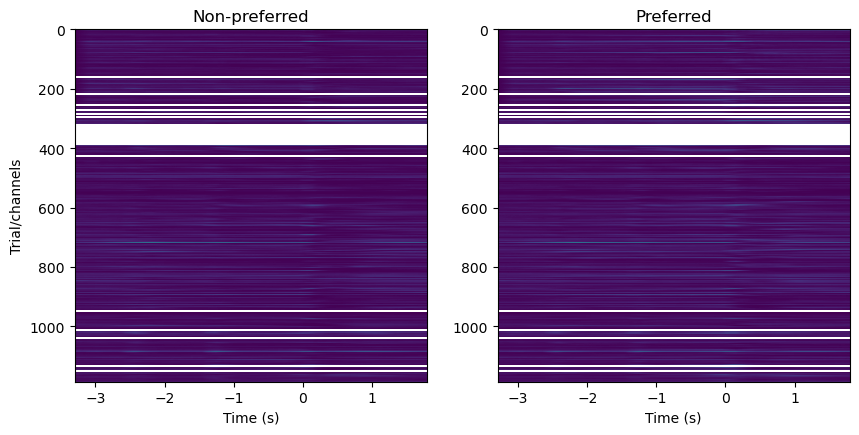

In [138]:
fig, ax = plt.subplots(1,2,figsize=(10,6))

ax[0].imshow(Nopr, extent=[t[0], t[-1], Nopr.shape[0], 0])
ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Trial/channels")
ax[0].set_title("Non-preferred")

ax[1].imshow(Pref, extent=[t[0], t[-1], Pref.shape[0], 0])
ax[1].set_aspect(1/ax[0].get_data_ratio())
ax[1].set_xlabel("Time (s)")
ax[1].set_title("Preferred")

plt.show()

#### Cleaning

In [139]:
# removing the empty rows (np.nan values)

Nopr = Nopr[np.isfinite(Nopr[:,0]),:]
chanidx = chanidx[np.isfinite(Pref[:,0])]
Pref = Pref[np.isfinite(Pref[:,0]),:]

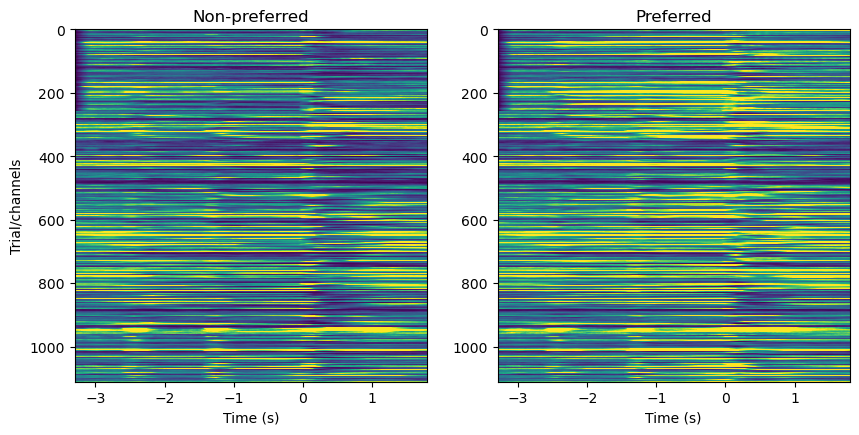

In [140]:
fig, ax = plt.subplots(1,2,figsize=(10,6))

ax[0].imshow(Nopr, extent=[t[0], t[-1], Nopr.shape[0], 0],
             vmin=0, vmax=10)
ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Trial/channels")
ax[0].set_title("Non-preferred")

ax[1].imshow(Pref, extent=[t[0], t[-1], Pref.shape[0], 0],
             vmin=0, vmax=10)
ax[1].set_aspect(1/ax[0].get_data_ratio())
ax[1].set_xlabel("Time (s)")
ax[1].set_title("Preferred")

plt.show()

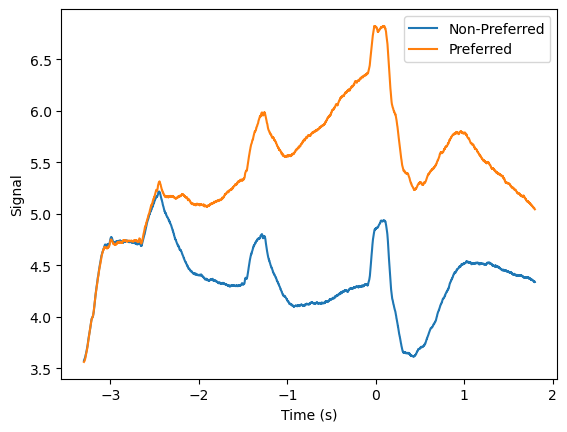

In [141]:
plt.plot(t, np.mean(Nopr, axis=0), label="Non-Preferred")
plt.plot(t, np.mean(Pref, axis=0), label="Preferred")
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.legend()
plt.show()

## Covariance matrices

In [142]:
# averaging signals for each channel for both neurons

nchans = np.max(chanidx)

chanaveNopr = np.zeros((nchans, len(t)))
chanavePref = np.zeros((nchans, len(t)))

for i in range(1,nchans+1):
    chanaveNopr[i-1,:] = np.mean(Nopr[chanidx==i,:], axis=0)
    chanavePref[i-1,:] = np.mean(Pref[chanidx==i,:], axis=0)

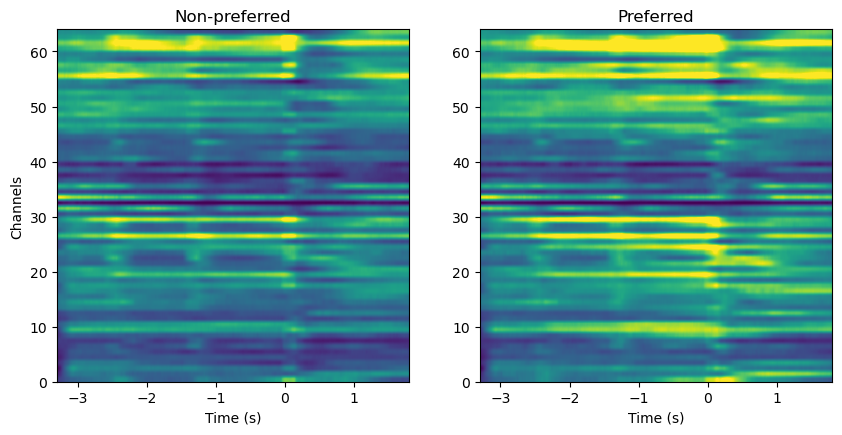

In [148]:
fig, ax = plt.subplots(1,2,figsize=(10,6))

ax[0].imshow(chanaveNopr, extent=[t[0], t[-1], 0, nchans],
             vmin=0, vmax=10, origin='lower')
ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Channels")
ax[0].set_title("Non-preferred")

ax[1].imshow(chanavePref, extent=[t[0], t[-1], 0, nchans],
             vmin=0, vmax=10, origin='lower')
ax[1].set_aspect(1/ax[0].get_data_ratio())
ax[1].set_xlabel("Time (s)")
ax[1].set_title("Preferred")

plt.show()

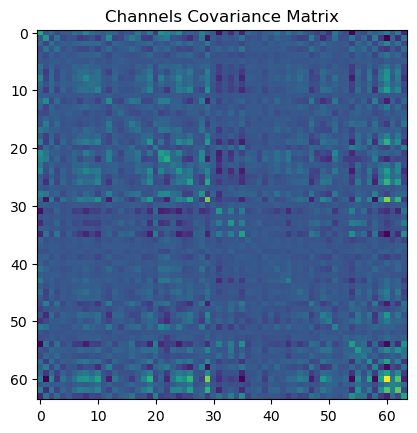

In [154]:
# compute covariance matrices

covmatPref = np.cov(chanavePref)
covmatNopr = np.cov(chanaveNopr)

covmat = (covmatNopr+covmatPref)/2

plt.imshow(covmat)
plt.title("Channels Covariance Matrix")
plt.show()

## PCA

In [174]:
evals, evecs = np.linalg.eigh(covmat)

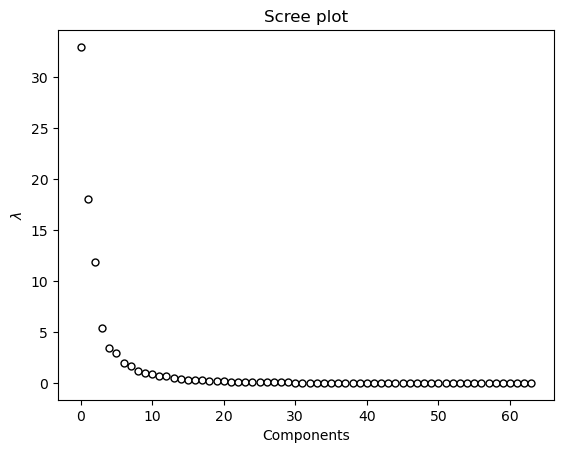

In [175]:
sidx = np.argsort(evals)[::-1]
evals = evals[sidx]
evecs = evecs[:,sidx]
plt.plot(evals, 'ko', markerfacecolor="w", markersize=5)
plt.title('Scree plot')
plt.xlabel('Components')
plt.ylabel('$\lambda$')
plt.show()

In [177]:
for i in range(2):
    #find largest component magnitude
    maxi = np.argmax(abs(evecs[:,i]))
    evecs[:,i] *= np.sign(evecs[maxi,i])

In [178]:
# computing PC time series

pcNopr = evecs[:, 0:2].T @ chanaveNopr
pcPref = evecs[:, 0:2].T @ chanavePref

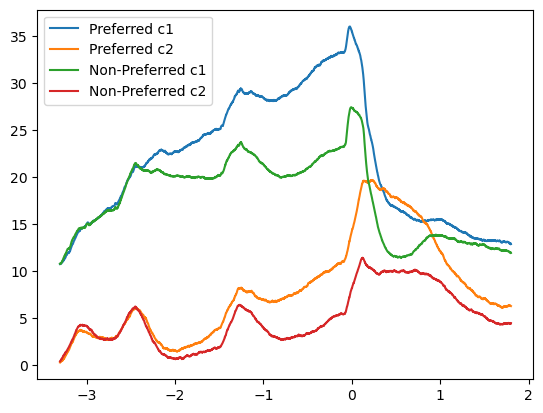

In [186]:
plt.plot(t, pcPref.T, label=['Preferred c1', 'Preferred c2'])
plt.plot(t, pcNopr.T, label=['Non-Preferred c1', 'Non-Preferred c2'])
plt.legend()
plt.show()

## State-space trajectories

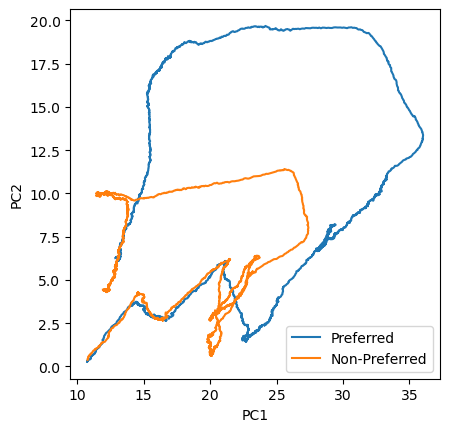

In [193]:
plt.plot(pcPref[0,:],pcPref[1,:], label="Preferred")
plt.plot(pcNopr[0,:],pcNopr[1,:], label="Non-Preferred")
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()